In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from kdelearn.kde_tasks import KDEOutliersDetection
from kdelearn.bandwidth_selection import direct_plugin, normal_reference
from kdelearn.metrics import pi_kf

In [2]:
!ls ../../data/mulcross/

phpGGVhl9.arff


In [3]:
data = pd.read_csv("../../data/mulcross/phpGGVhl9.arff", skiprows=7, names=["v1", "v2", "v3", "v4", "target"])

In [4]:
data.loc[data["target"] == "'Normal'", "target"] = 0
data.loc[data["target"] == "'Anomaly'", "target"] = 1
data["target"] = data["target"].astype(int)

In [5]:
data.shape

(262144, 5)

# EDA

In [6]:
data["target"].value_counts()

0    235930
1     26214
Name: target, dtype: int64

# 2d scatter plots

\newpage

## v1 vs v2

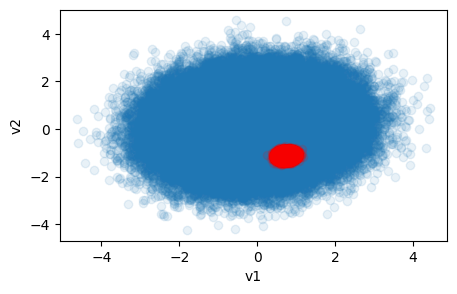

In [7]:
fig = plt.figure(figsize=(5, 3))

plt.scatter(data["v1"], data["v2"], alpha=0.1)
plt.scatter(data.loc[data["target"] == 1, "v1"],
            data.loc[data["target"] == 1, "v2"], alpha=0.1, c="red")

plt.xlabel("v1")
plt.ylabel("v2")

plt.show()

## v1 vs v3

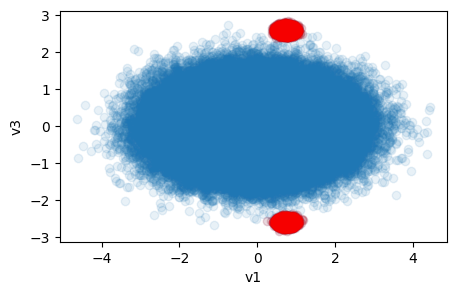

In [8]:
fig = plt.figure(figsize=(5, 3))

plt.scatter(data["v1"], data["v3"], alpha=0.1)
plt.scatter(data.loc[data["target"] == 1, "v1"],
            data.loc[data["target"] == 1, "v3"], alpha=0.1, c="red")

plt.xlabel("v1")
plt.ylabel("v3")

plt.show()

\newpage

## v1 vs v4

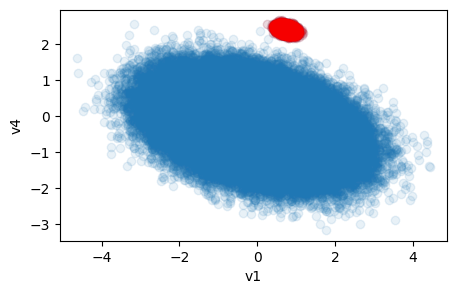

In [9]:
fig = plt.figure(figsize=(5, 3))

plt.scatter(data["v1"], data["v4"], alpha=0.1)
plt.scatter(data.loc[data["target"] == 1, "v1"],
            data.loc[data["target"] == 1, "v4"], alpha=0.1, c="red")

plt.xlabel("v1")
plt.ylabel("v4")

plt.show()

## v2 vs v3

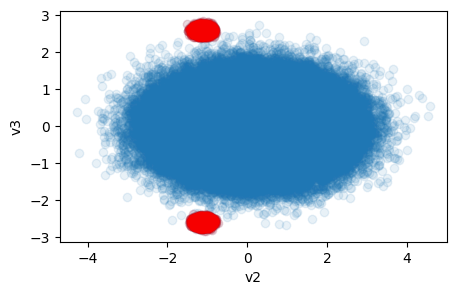

In [10]:
fig = plt.figure(figsize=(5, 3))

plt.scatter(data["v2"], data["v3"], alpha=0.1)
plt.scatter(data.loc[data["target"] == 1, "v2"],
            data.loc[data["target"] == 1, "v3"], alpha=0.1, c="red")

plt.xlabel("v2")
plt.ylabel("v3")

plt.show()

\newpage

## v2 vs v4

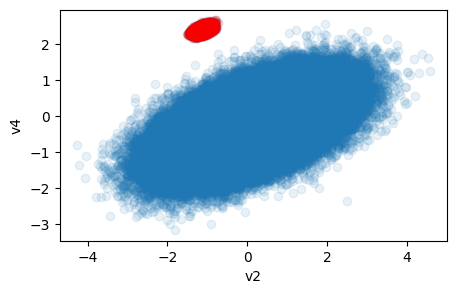

In [11]:
fig = plt.figure(figsize=(5, 3))

plt.scatter(data["v2"], data["v4"], alpha=0.1)
plt.scatter(data.loc[data["target"] == 1, "v2"],
            data.loc[data["target"] == 1, "v4"], alpha=0.1, c="red")

plt.xlabel("v2")
plt.ylabel("v4")

plt.show()

## v3 vs v4

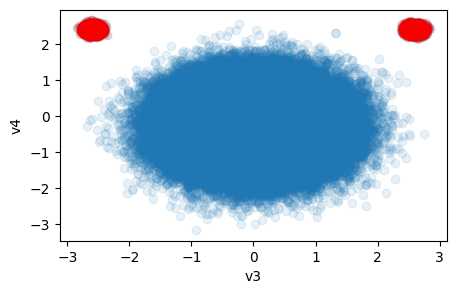

In [12]:
fig = plt.figure(figsize=(5, 3))

plt.scatter(data["v3"], data["v4"], alpha=0.1)
plt.scatter(data.loc[data["target"] == 1, "v3"],
            data.loc[data["target"] == 1, "v4"], alpha=0.1, c="red")

plt.xlabel("v3")
plt.ylabel("v4")

plt.show()

\newpage

# 3d scatter plots

## v1 vs v2 vs v3

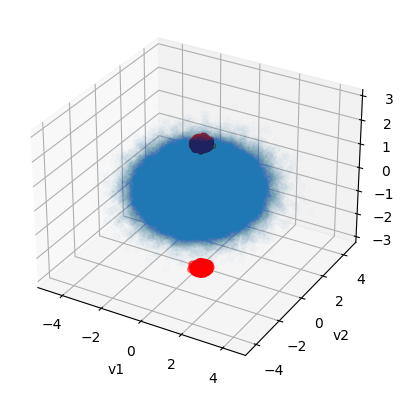

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data.loc[data["target"] == 0, "v1"],
           data.loc[data["target"] == 0, "v2"],
           data.loc[data["target"] == 0, "v3"], alpha=0.01)
ax.scatter(data.loc[data["target"] == 1, "v1"],
           data.loc[data["target"] == 1, "v2"],
           data.loc[data["target"] == 1, "v3"], alpha=0.5, c="red")

ax.set_xlabel("v1")
ax.set_ylabel("v2")
ax.set_zlabel("v3")
plt.show()

## v1 vs v2 vs v4

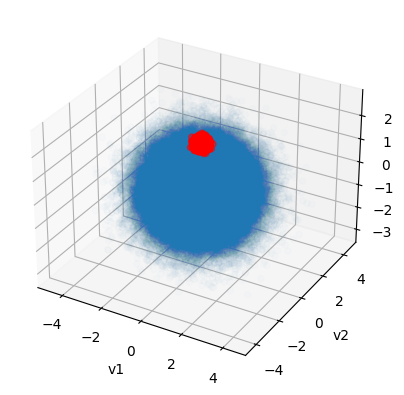

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data.loc[data["target"] == 0, "v1"],
           data.loc[data["target"] == 0, "v2"],
           data.loc[data["target"] == 0, "v4"], alpha=0.01)
ax.scatter(data.loc[data["target"] == 1, "v1"],
           data.loc[data["target"] == 1, "v2"],
           data.loc[data["target"] == 1, "v4"], alpha=0.5, c="red")

ax.set_xlabel("v1")
ax.set_ylabel("v2")
ax.set_zlabel("v4")
plt.show()

## v1 vs v3 vs v4

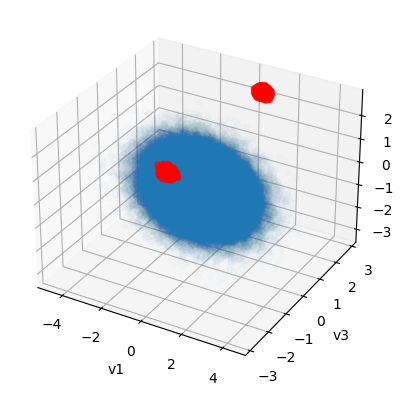

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data.loc[data["target"] == 0, "v1"],
           data.loc[data["target"] == 0, "v3"],
           data.loc[data["target"] == 0, "v4"], alpha=0.01)
ax.scatter(data.loc[data["target"] == 1, "v1"],
           data.loc[data["target"] == 1, "v3"],
           data.loc[data["target"] == 1, "v4"], alpha=0.5, c="red")

ax.set_xlabel("v1")
ax.set_ylabel("v3")
ax.set_zlabel("v4")
plt.show()

## v2 vs v3 vs v4

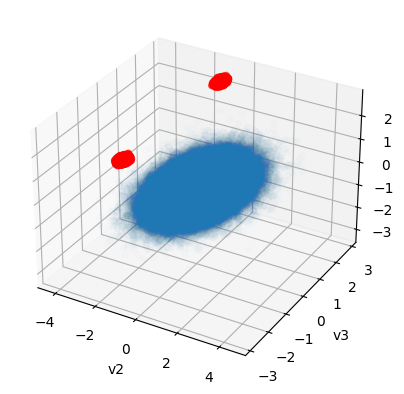

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(data.loc[data["target"] == 0, "v2"],
           data.loc[data["target"] == 0, "v3"],
           data.loc[data["target"] == 0, "v4"], alpha=0.01)
ax.scatter(data.loc[data["target"] == 1, "v2"],
           data.loc[data["target"] == 1, "v3"],
           data.loc[data["target"] == 1, "v4"], alpha=0.5, c="red")

ax.set_xlabel("v2")
ax.set_ylabel("v3")
ax.set_zlabel("v4")
plt.show()

\newpage

# Outliers detection

## all data

In [6]:
x_train = data[["v1", "v2", "v3", "v4"]].to_numpy()
labels_train = data["target"].to_numpy()

print(x_train.shape, labels_train.shape)

(262144, 4) (262144,)


In [7]:
bandwidth = np.array([0.02687994, 0.02610197, 0.02315374, 0.01958707])

### r=0.1

In [8]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.1)
labels_pred = outliers_detector.predict(x_train)

print(f"wskaźnik: {pi_kf(x_train, labels_pred, bandwidth=bandwidth)}")

wskaźnik: 0.9999906830423181


In [9]:
labels_pred.sum(), labels_train.sum()

(26215, 26214)

In [10]:
res = confusion_matrix(labels_train, labels_pred)
res

array([[209717,  26213],
       [ 26212,      2]])

In [11]:
print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

precision: 7.629219912263972e-05
recall: 7.629510948348211e-05
accuracy: 0.8000144958496094


### r=0.01

In [12]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.01)
labels_pred = outliers_detector.predict(x_train)

print(f"wskaźnik: {pi_kf(x_train, labels_pred, bandwidth=bandwidth)}")

wskaźnik: 0.9999999999960743


In [13]:
labels_pred.sum(), labels_train.sum()

(7159, 26214)

In [14]:
res = confusion_matrix(labels_train, labels_pred)
res

array([[228771,   7159],
       [ 26214,      0]])

In [15]:
print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

precision: 0.0
recall: 0.0
accuracy: 0.8726921081542969


### r=0.05

In [16]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.05)
labels_pred = outliers_detector.predict(x_train)
print(f"wskaźnik: {pi_kf(x_train, labels_pred, bandwidth=bandwidth)}")

wskaźnik: 0.9999999883601628


In [17]:
labels_pred.sum(), labels_train.sum()

(13108, 26214)

In [18]:
res = confusion_matrix(labels_train, labels_pred)
res

array([[222822,  13108],
       [ 26214,      0]])

In [19]:
print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

precision: 0.0
recall: 0.0
accuracy: 0.8499984741210938


### r=0.2

In [20]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.2)
labels_pred = outliers_detector.predict(x_train)
print(f"wskaźnik: {pi_kf(x_train, labels_pred, bandwidth=bandwidth)}")

wskaźnik: 0.998972047367186


In [21]:
labels_pred.sum(), labels_train.sum()

(52429, 26214)

In [22]:
res = confusion_matrix(labels_train, labels_pred)
res

array([[183508,  52422],
       [ 26207,      7]])

In [23]:
print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

precision: 0.0001335138949817849
recall: 0.0002670328831921874
accuracy: 0.7000541687011719


\newpage

In [8]:
x_train = data[["v1", "v2", "v3", "v4"]].to_numpy()
labels_train = data["target"].to_numpy()
print(x_train.shape, labels_train.shape)

# x_train = x_train[idx]
# labels_train = labels_train[idx]
# print(x_train.shape, labels_train.shape)

(262144, 4) (262144,)


In [9]:
bandwidth = direct_plugin(x_train)
bandwidth

array([0.02687994, 0.02610197, 0.02315374, 0.01958707])

In [10]:
outliers_detector = KDEOutliersDetection().fit(x_train, bandwidth=bandwidth, r=0.1)
labels_pred = outliers_detector.predict(x_train)

In [11]:
labels_pred.sum(), labels_train.sum()

(26215, 26214)

In [12]:
res = confusion_matrix(labels_train, labels_pred)
res

array([[209717,  26213],
       [ 26212,      2]])

In [13]:
print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

precision: 7.629219912263972e-05
recall: 7.629510948348211e-05
accuracy: 0.8000144958496094


\newpage

## 2d only (v3, v4)

In [15]:
x_train_2d = data[["v3", "v4"]].to_numpy()
labels_train_2d = data["target"].to_numpy()
print(x_train_2d.shape, labels_train_2d.shape)

# x_train_2d = x_train_2d[idx]
# labels_train_2d = labels_train_2d[idx]
# print(x_train_2d.shape, labels_train_2d.shape)

(262144, 2) (262144,)


In [16]:
outliers_detector_2d = KDEOutliersDetection().fit(x_train_2d, bandwidth=bandwidth[-2:], r=0.1)
labels_pred_2d = outliers_detector_2d.predict(x_train_2d)

In [17]:
labels_pred_2d.sum(), labels_train_2d.sum()

(26215, 26214)

In [18]:
res = confusion_matrix(labels_train_2d, labels_pred_2d)
res

array([[210066,  25864],
       [ 25863,    351]])

In [19]:
print(f"precision: {res[1, 1] / res[:, 1].sum()}")
print(f"recall: {res[1, 1] / res[1, :].sum()}")
print(f"accuracy: {np.diag(res).sum() / res.sum()}")

precision: 0.013389280946023268
recall: 0.01338979171435111
accuracy: 0.8026771545410156


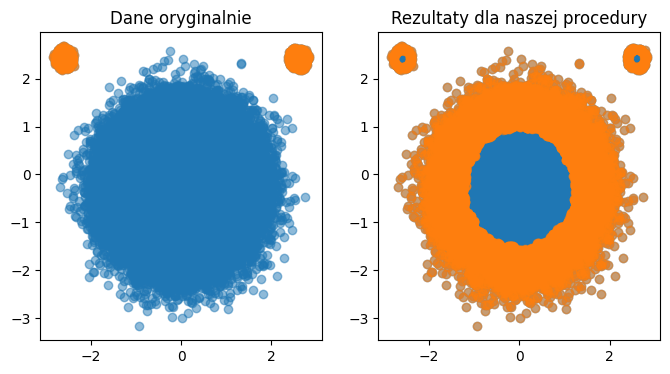

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].scatter(x_train_2d[:, 0], x_train_2d[:, 1], alpha=0.5)
axs[0].scatter(x_train_2d[labels_train_2d==1, 0], x_train_2d[labels_train_2d==1, 1], alpha=0.5)
axs[0].set_title("Dane oryginalnie")

axs[1].scatter(x_train_2d[:, 0], x_train_2d[:, 1], alpha=0.5)
axs[1].scatter(x_train_2d[labels_pred_2d==1, 0], x_train_2d[labels_pred_2d==1, 1], alpha=0.5)
axs[1].set_title("Rezultaty dla naszej procedury")

plt.show()